Set the environment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/ZYGOSGIANNIS/Documents/DATA SCIENCE AND MACHINE LEARNING/Export_mcp_crime_2025-08-18.csv")

Inspect data

In [5]:
df

,year,crime,committed,attempted,solved,domestic_criminals,foreign_criminals
0,2014,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,105,155,234,224,131
1,2014,ΑΠΑΤΕΣ,2877,158,1426,1087,144
2,2014,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,73,9,68,97,17
3,2014,ΒΙΑΣΜΟΙ,134,64,143,108,54
4,2014,ΕΚΒΙΑΣΕΙΣ,166,4,125,181,48
...,...,...,...,...,...,...,...
214,2018,Ληστείες σε πρακτορεία ΟΠΑΠ,81,6,10,8,5
215,2018,Ληστείες σούπερ μάρκετ,104,3,26,19,11
216,2018,Ληστείες ταχυδρομικών διανομέων,5,0,2,0,0
217,2018,Ληστείες τραπεζών,10,0,7,9,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                219 non-null    int64 
 1   crime               219 non-null    object
 2   committed           219 non-null    int64 
 3   attempted           219 non-null    int64 
 4   solved              219 non-null    int64 
 5   domestic_criminals  219 non-null    int64 
 6   foreign_criminals   219 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 12.1+ KB


In [7]:
df.describe()

,year,committed,attempted,solved,domestic_criminals,foreign_criminals
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2016.009132,3217.840183,155.063927,1144.392694,765.178082,365.803653
std,1.407682,5122.120199,406.405947,1993.376151,1847.215132,754.531000
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,95.000000,3.000000,59.500000,26.000000,13.000000
50%,2016.000000,577.000000,14.000000,194.000000,138.000000,61.000000
75%,2017.000000,3865.500000,72.000000,1598.000000,480.000000,270.500000
max,2018.000000,24022.000000,2419.000000,12909.000000,11975.000000,5109.000000


Improve dataset

In [8]:
# Create new columns
df.insert(5,'total_crimes', df['committed'] + df['attempted'])

In [9]:
df.insert(8, 'total_criminals', df['domestic_criminals'] + df['foreign_criminals'])

In [10]:
solved_idx = df.columns.get_loc('solved')
df.insert(solved_idx + 1, 'unsolved', df['total_crimes'] - df['solved'])

In [11]:
df

,year,crime,committed,attempted,solved,unsolved,total_crimes,domestic_criminals,foreign_criminals,total_criminals
0,2014,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,105,155,234,26,260,224,131,355
1,2014,ΑΠΑΤΕΣ,2877,158,1426,1609,3035,1087,144,1231
2,2014,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,73,9,68,14,82,97,17,114
3,2014,ΒΙΑΣΜΟΙ,134,64,143,55,198,108,54,162
4,2014,ΕΚΒΙΑΣΕΙΣ,166,4,125,45,170,181,48,229
...,...,...,...,...,...,...,...,...,...,...
214,2018,Ληστείες σε πρακτορεία ΟΠΑΠ,81,6,10,77,87,8,5,13
215,2018,Ληστείες σούπερ μάρκετ,104,3,26,81,107,19,11,30
216,2018,Ληστείες ταχυδρομικών διανομέων,5,0,2,3,5,0,0,0
217,2018,Ληστείες τραπεζών,10,0,7,3,10,9,3,12


Explore dataset

In [12]:
print(f"Crime categories are:", "\n",  df['crime'].unique())

Crime categories are: 
 ['ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ' 'ΑΠΑΤΕΣ' 'ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ' 'ΒΙΑΣΜΟΙ' 'ΕΚΒΙΑΣΕΙΣ'
 'ΕΠΑΙΤΕΙΑ' 'ΖΩΟΚΛΟΠΗ' 'ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ' 'ΛΑΘΡΕΜΠΟΡΙΟ'
 'Ν περί ΝΑΡΚΩΤΙΚΩΝ' 'Ν περί ΟΠΛΩΝ' 'Ν περί ΠΝΕΥΜΑΤΙΚΗΣ ΙΔΙΟΚΤΗΣΙΑΣ'
 'ΠΛΑΣΤΟΓΡΑΦΙΑ' 'ΣΕΞΟΥΑΛΙΚΗ ΕΚΜΕΤΑΛΛΕΥΣΗ'
 'Κλοπές - Διαρρήξεις από ιχε αυτ/τα' 'Κλοπές - Διαρρήξεις ιερών ναών'
 'Κλοπές - Διαρρήξεις καταστημάτων' 'Κλοπές - Διαρρήξεις λοιπές'
 'Κλοπές - Διαρρήξεις οικιών' 'Κλοπές - Διαρρήξεις σε συγκοινωνιακά μέσα'
 'Κλοπές με αρπαγές τσαντών' 'Κλοπές σε δημόσιο χώρο-μικροκλοπες'
 'Κλοπές Τροχοφόρων ΙΧΕ αυτ/των' 'Κλοπές Τροχοφόρων ΙΧΦ-Λεωφορείων'
 'Κλοπές Τροχοφόρων Λοιπών οχημάτων' 'Κλοπές Τροχοφόρων Μοτοποδηλάτων'
 'Κλοπές Τροχοφόρων Μοτοσυκλετών' 'Ληστείες Δ.Ο.Υ.'
 'Ληστείες εντός καταστημάτων' 'Ληστείες εντός οικιών'
 'Ληστείες κινητών τηλεφώνων-μικροποσών' 'Ληστείες λοιπές'
 'Ληστείες με αρπαγή τσάντας' 'Ληστείες οδηγών ταξί'
 'Ληστείες πρατηρίων υγρών καυσίμων' 'Ληστείες σε ΕΛ.ΤΑ.'
 'Ληστείες σε Μίνι Μάρκετ-κατ/τα ψιλικών' 

In [13]:
# Clean categories for readability
clean_mapping = {
    # Legal references
    'Ν περί ΝΑΡΚΩΤΙΚΩΝ': 'Νόμος περί ναρκωτικών',
    'Ν περί ΟΠΛΩΝ': 'Νόμος περί όπλων',
    'Ν περί ΠΝΕΥΜΑΤΙΚΗΣ ΙΔΙΟΚΤΗΣΙΑΣ': 'Νόμος περί πνευματικής ιδιοκτησίας',
    
    # Capitalization fixes
    'ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ': 'Ανθρωποκτονίες',
    'ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ': 'Κυκλοφορία παραχαραγμένων',
    'ΑΠΟΠΛΑΝΗΣΕΙΣ': 'Αποπλανήσεις',
    'ΑΠΑΤΕΣ': 'Απάτες',
    'ΕΚΒΙΑΣΕΙΣ': 'Εκβιάσεις',
    'ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ': 'Αρχαιοκαπηλεία',
    'ΒΙΑΣΜΟΙ': 'Βιασμοί',
    'ΕΚΒΙΑΣΕΙΣ': 'Εκβιάσεις',
    'ΕΠΑΙΤΕΙΑ': 'Επαιτεία',
    'ΖΩΟΚΛΟΠΗ': 'Ζωοκλοπή',
    'ΛΑΘΡΕΜΠΟΡΙΟ': 'Λαθρεμπόριο',
    'ΠΛΑΣΤΟΓΡΑΦΙΑ': 'Πλαστογραφία',
    'ΣΕΞΟΥΑΛΙΚΗ ΕΚΜΕΤΑΛΛΕΥΣΗ': 'Σεξουαλική εκμετάλλευση',
    'ΠΑΡΑΧΑΡΑΞΗ': 'Παραχάραξη',
    
    
    # Abbreviation expansions
    'Κλοπές - Διαρρήξεις από ιχε αυτ/τα': 'Κλοπές - Διαρρήξεις από ΙΧΕ αυτοκίνητα',
    'Κλοπές Τροχοφόρων ΙΧΕ αυτ/των': 'Κλοπές τροχοφόρων ΙΧΕ αυτοκινήτων',
    'Κλοπές Τροχοφόρων ΙΧΦ': 'Κλοπές τροχοφόρων ΙΧ φορτηγών',
    'Κλοπές Τροχοφόρων ΙΧΦ-Λεωφορείων': 'Κλοπές τροχοφόρων ΙΧ φορτηγών-λεωφορείων',
    
    # Consistency fixes
    'Ληστείες τραπεζών,ταχ/κών ταμιευτηρίων': 'Ληστείες τραπεζών, ταχυδρομικών ταμιευτηρίων',
    'Ληστείες σε Μίνι Μάρκετ-κατ/τα ψιλικών': "Ληστείες σε Μίνι Μάρκετ-καταστήματα ψιλικών",
    
    # Typo fixes
    'Κλοπές - Διαρρήξεις ιχε αυτ/τα': 'Κλοπές - Διαρρήξεις ΙΧΕ αυτοκινήτων',
    'Ληστείες σε ΕΛ.ΤΑ.': 'Ληστείες σε ταχυδρομεία (ΕΛΤΑ)'
}

df['crime'] = df['crime'].replace(clean_mapping)

In [14]:
print(f"Total number of crime categories: {len(df['crime'].unique())}")

Total number of crime categories: 47


In [15]:
print(f"Most common crime is: {df.loc[df['total_crimes'].idxmax(), 'crime']}, {df['total_crimes'].max()} total incidents.")

Most common crime is: Κλοπές - Διαρρήξεις οικιών, 26370 total incidents.


In [16]:
print(f"Crime with most criminals involved is: {df.loc[df['total_criminals'].idxmax(), 'crime']}, {df['total_criminals'].max()} total incidents.")

Crime with most criminals involved is: Νόμος περί ναρκωτικών, 16124 total incidents.


In [17]:
df['total_crimes'].sum()

np.int64(738666)

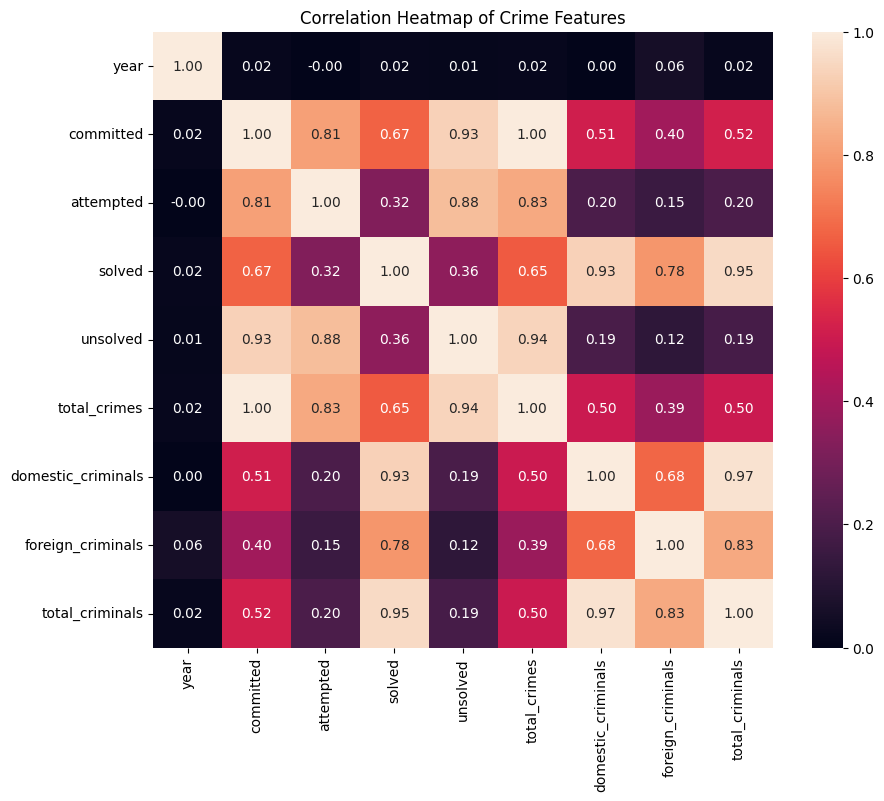

In [32]:
import seaborn as sns


plt.figure(figsize=(10,8))
sns.heatmap(df[df.select_dtypes(include=['int64', 'float64']).columns].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Crime Features")
plt.show()

Many commited crimes are unsolved, solved did by domestic criminals, the most criminals are domestic.

In [34]:
top_com_crimes = df.groupby('crime')['committed'].sum().sort_values(ascending=False).head(10)

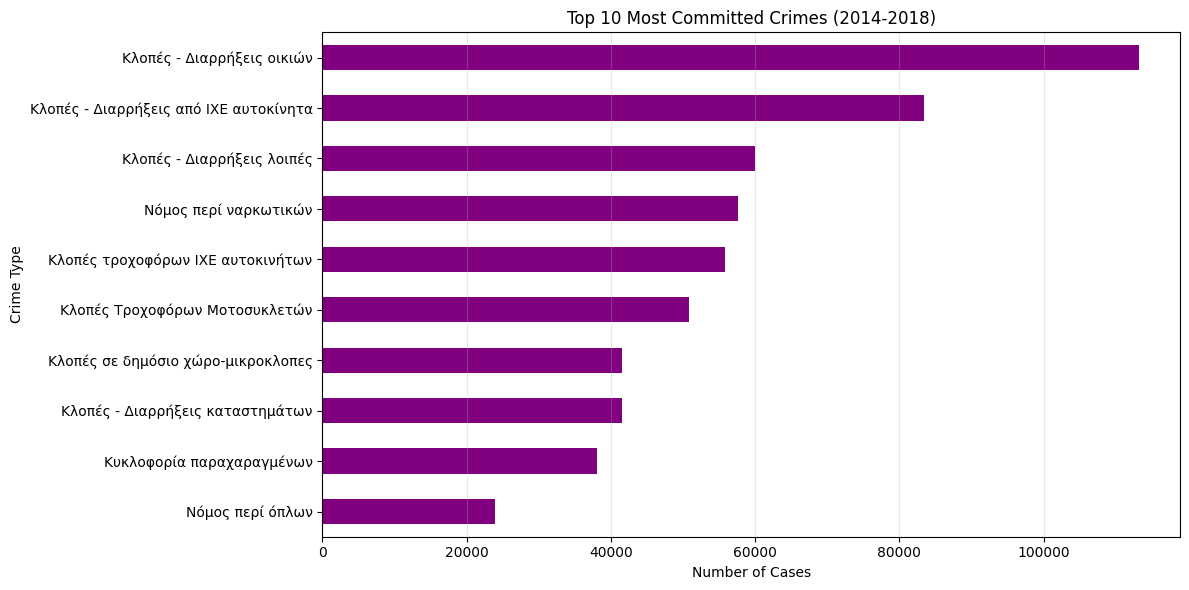

In [35]:
plt.figure(figsize=(12, 6))
top_com_crimes.sort_values(ascending= True).plot(kind='barh', color='purple')
plt.title('Top 10 Most Committed Crimes (2014-2018)')
plt.xlabel('Number of Cases')
plt.ylabel('Crime Type')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
# Calculate unsolved cases
top10_unsolved = df.groupby('crime')['unsolved'].sum().sort_values(ascending= False).head(10)

In [37]:
top10_unsolved

crime
Κλοπές - Διαρρήξεις οικιών                   102510
Κλοπές - Διαρρήξεις από ΙΧΕ αυτοκίνητα        81701
Κλοπές - Διαρρήξεις λοιπές                    46121
Κλοπές τροχοφόρων ΙΧΕ αυτοκινήτων             42113
Κλοπές Τροχοφόρων Μοτοσυκλετών                37789
Κλοπές σε δημόσιο χώρο-μικροκλοπες            37156
Κυκλοφορία παραχαραγμένων                     29256
Κλοπές - Διαρρήξεις καταστημάτων              29241
Κλοπές - Διαρρήξεις σε συγκοινωνιακά μέσα     18670
Απάτες                                        11249
Name: unsolved, dtype: int64

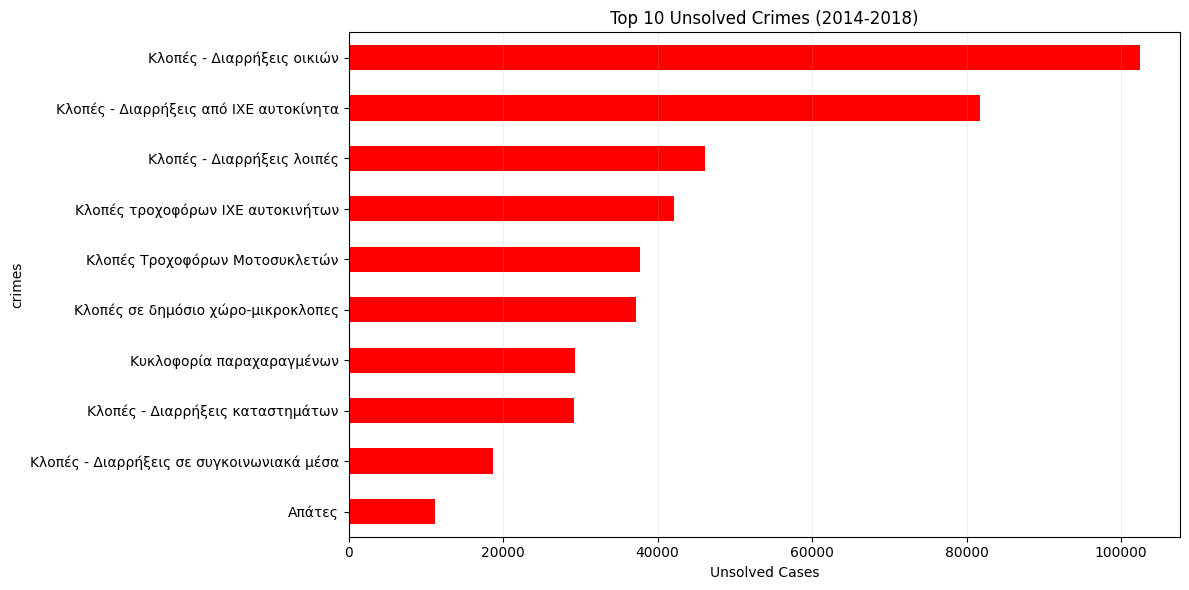

In [38]:
plt.figure(figsize=(12, 6))
ax = top10_unsolved.sort_values(ascending= True).plot(kind='barh', color='red')
plt.title('Top 10 Unsolved Crimes (2014-2018)')
plt.xlabel('Unsolved Cases')
plt.ylabel('crimes')

plt.grid(axis='x', alpha=0.2)
plt.tight_layout()
plt.show()

In [39]:
attempted_by_crime = df.groupby('crime')['attempted'].sum().sort_values(ascending=False)

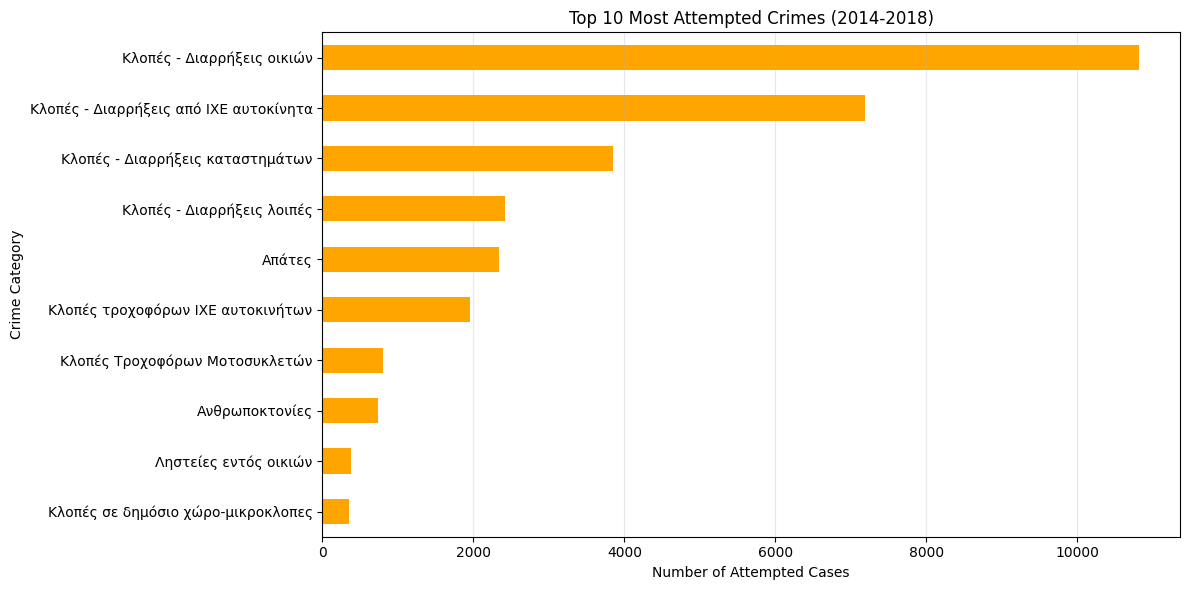

In [40]:
plt.figure(figsize=(12, 6))
attempted_by_crime.head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Most Attempted Crimes (2014-2018)')
plt.xlabel('Number of Attempted Cases')
plt.ylabel('Crime Category')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

We see that there are many common...

Lets explore data further

In [41]:
import seaborn as sns

In [42]:
crime_cols = ['committed', 'attempted', 'solved']
corr_matrix = df[crime_cols].corr()

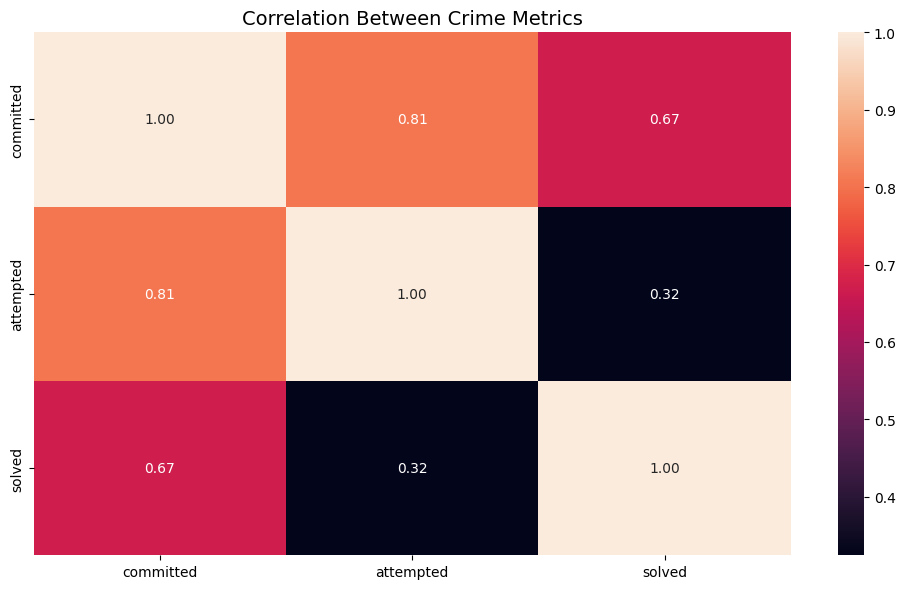

In [46]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Between Crime Metrics', fontsize=14)
plt.tight_layout()
plt.show()

there is a positive correlation betwwen attempted and commited crimes.

In [47]:
top_crimes_foreign = df.groupby('crime')['foreign_criminals'].sum().nlargest(5)
top_crimes_domestic = df.groupby('crime')['domestic_criminals'].sum().nlargest(5)

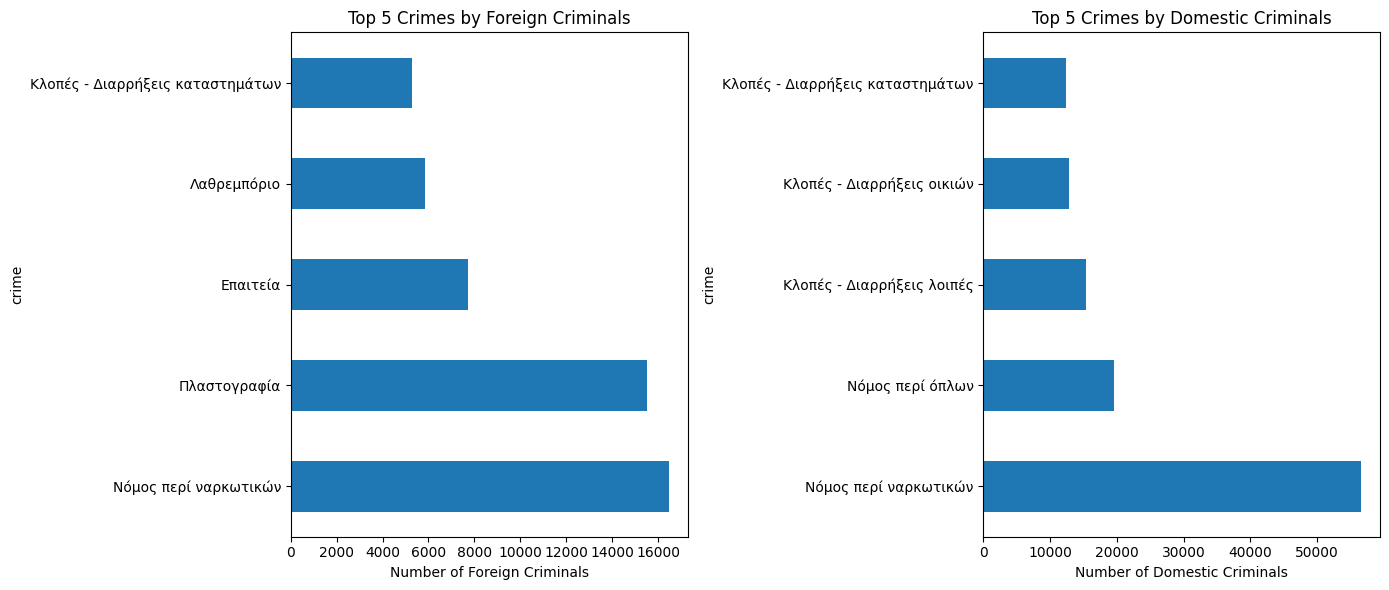

In [48]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

top_crimes_foreign.plot(kind='barh', ax=ax1)
ax1.set_title('Top 5 Crimes by Foreign Criminals')
ax1.set_xlabel('Number of Foreign Criminals')

top_crimes_domestic.plot(kind='barh', ax=ax2)
ax2.set_title('Top 5 Crimes by Domestic Criminals')
ax2.set_xlabel('Number of Domestic Criminals')

plt.tight_layout()
plt.show()

In [49]:
total_for = df['foreign_criminals'].sum()
total_dom = df['domestic_criminals'].sum()

In [50]:
print(f"Total Domestic Criminals: {total_dom:,}")
print(f"Total Foreign Criminals: {total_for:,}")
print(f"Foreign Criminal Percentage: {total_for / (total_dom + total_for):.1%}")

Total Domestic Criminals: 167,574
Total Foreign Criminals: 80,111
Foreign Criminal Percentage: 32.3%


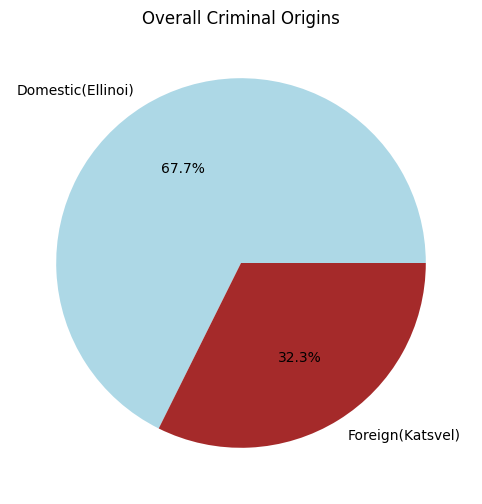

In [51]:
# Pie Plot for foreign vs domestic criminals
plt.figure(figsize=(8, 6))
plt.pie(
    [total_dom, total_for],
    labels=['Domestic(Ellinoi)', 'Foreign(Katsvel)'],
    colors=['lightblue', 'brown'],
    autopct='%1.1f%%',
)
plt.title('Overall Criminal Origins')
plt.show()

Greek criminals criminals dominate.

Trends of crimes over years

In [52]:
yearly_trends = df.groupby('year')[['total_crimes', 'committed', 'attempted']].sum()

<Figure size 2000x600 with 0 Axes>

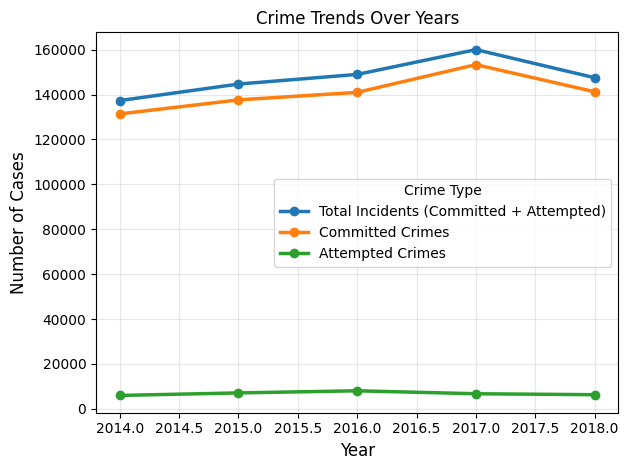

In [53]:
# Plot
plt.figure(figsize=(20, 6))
yearly_trends.plot(marker='o', linewidth=2.5)
plt.title('Crime Trends Over Years')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.grid(alpha=0.3)

# Customize legend
plt.legend(
    title='Crime Type',
    labels=['Total Incidents (Committed + Attempted)', 'Committed Crimes', 'Attempted Crimes']
)

plt.tight_layout()
plt.show()

2017 was a bad year.

Lets see the clearance over years

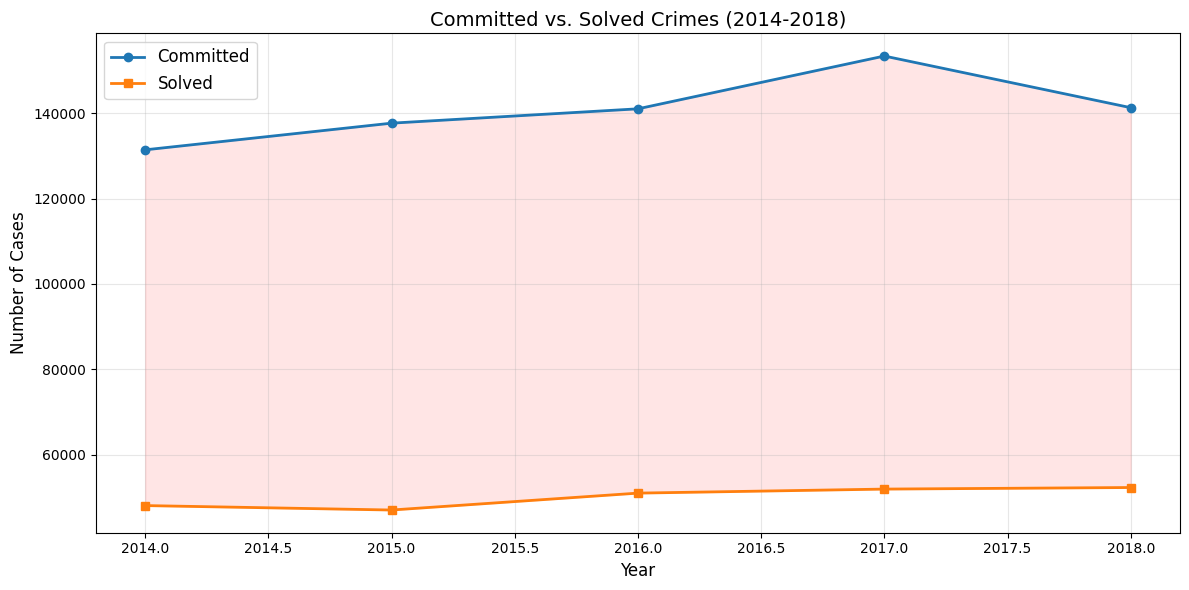

In [92]:
# Group by year and sum committed/solved crimes
yearly_data = df.groupby('year')[['committed', 'solved']].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data['committed'], marker='o', label='Committed', linewidth=2)
plt.plot(yearly_data.index, yearly_data['solved'], marker='s', label='Solved', linewidth=2)

# Customize
plt.title('Committed vs. Solved Crimes (2014-2018)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Highlight the gap
plt.fill_between(
    yearly_data.index,
    yearly_data['solved'],
    yearly_data['committed'],
    color='red',
    alpha=0.1,
    label='Unsolved Gap'
)

plt.tight_layout()
plt.show()

Some Statistical analysis

In [55]:
from scipy.stats import f_oneway

In [62]:
df['solve_rate'] = df['solved'] / (df['committed'] + df['attempted'] + 1)

In [63]:
# Compare solve rates across top 5 crime categories
top5 = df['crime'].value_counts().head(5).index
subset = df[df['crime'].isin(top5)]

In [64]:
groups = [subset[subset['crime'] == crime]['solve_rate'] for crime in top5]

In [65]:
# ANOVA
f_stat, p_val = f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

ANOVA F-statistic: 52.182726727618665
p-value: 2.6452860186805086e-10


In [68]:
if p_val < 0.001:
    print("p < 0.001")
else:
    print(f"p = {p_val}")

p < 0.001


The results were statistically significant (F = 52.18, p < 0.001), indicating that not all crime categories share the same average solve rate.
This confirms that crime type is an important factor in determining how likely a case is to be solved.

In [69]:
from scipy.stats import spearmanr

corr, p_val = spearmanr(df['committed'], df['solved'])
print("Spearman correlation:", corr, "p-value:", p_val)

Spearman correlation: 0.9252634236242046 p-value: 2.583130161910035e-93


As the number of committed crimes increases, the number of solved cases also tends to increase.We captured monotonic strong relationship.

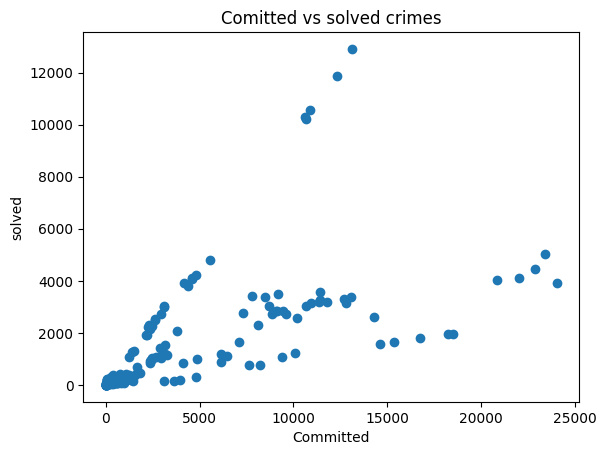

In [89]:
# How many crimes actually get solved
plt.scatter(df['committed'], df['solved'])
plt.title("Comitted vs solved crimes")
plt.xlabel("Committed")
plt.ylabel("solved")
plt.show()

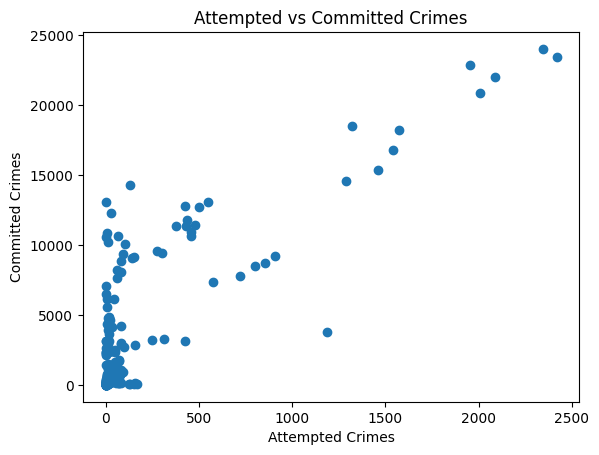

In [87]:
# How often crimes fail
plt.scatter(df['attempted'], df['committed'])
plt.title("Attempted vs Committed Crimes")
plt.xlabel("Attempted Crimes")
plt.ylabel("Committed Crimes")
plt.show()